In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# import
import numpy as np
import matplotlib.pyplot as plt
from t_optimize_hyperparameters import *

# Create a dataset

In [2]:
from build_poly import build_poly
from standard import standardize 

# number of samples in the dataset
num_data = 1000

# features
x = np.linspace(0.1, 2 * np.pi, num_data)
x = x[:, None]

# observations
offset = 1
noiseLevel = 0.8
y = np.sin(x[:,0]) + offset + noiseLevel * np.random.randn(num_data).T

# standardize 
x, mean_x, std_x = standardize(x)

print('x: ', x.shape)
print('y: ', y.shape)

x:  (1000, 1)
y:  (1000,)


# Tune degree of the polynomial basis function for ridge regression

tested degree:  [1 2 3 4 5 6 7] 

------------------------------------------ test with degree =  1
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.916776247708
Mean testing loss:  0.916736206369
------------------------------------------ test with degree =  2
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.916717673743
Mean testing loss:  0.917847316475
------------------------------------------ test with degree =  3
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.811317551219
Mean testing loss:  0.813789336551
------------------------------------------ test with degree =  4
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.808833180393
Mean testing loss:  0.812047570274
------------------------------------------ test with degree =  5
Number of samples in total:  1000
Number of folds:  10  of 100 sample

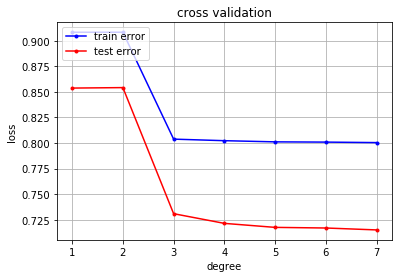

In [3]:
# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['lambda_'] = 0
arg_rr['k_fold'] = 10

# optimization parameters
degree_min = 1 
degree_max = 7
degree_steps = 1

# optimize degree
degree_opt = optimize_degree(y, x, degree_min, degree_max, degree_steps, arg_rr)

# Tune lambda_ (regularization) for ridge regression

tested lambda_:  [  1.00000000e-10   1.66810054e-09   2.78255940e-08   4.64158883e-07
   7.74263683e-06   1.29154967e-04   2.15443469e-03   3.59381366e-02
   5.99484250e-01   1.00000000e+01] 

------------------------------------------ test with lambda_ =  1e-10
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.811317551686
Mean testing loss:  0.813789337018
------------------------------------------ test with lambda_ =  1.6681005372e-09
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.811317559012
Mean testing loss:  0.813789344342
------------------------------------------ test with lambda_ =  2.78255940221e-08
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.811317681216
Mean testing loss:  0.813789466509
------------------------------------------ test with lambda_ =  4.64158883361e-07
Number of samples in total:  1000
Number of folds:  10  of 100 

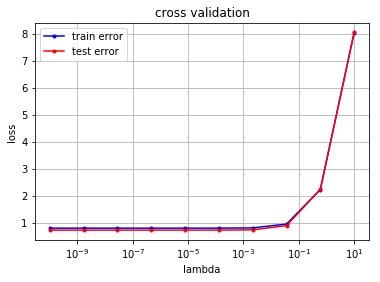

In [4]:
# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['degree'] = 3
arg_rr['k_fold'] = 10

# optimization parameters
lambda_min = -10 
lambda_max = 1
lambda_steps = 10

# optimize lambda_
lambda_opt = optimize_lambda(y, x, lambda_min, lambda_max, lambda_steps, arg_rr)

# Tune gamma (step descent) for least square gradient descent

tested gamma:  [ 1.00002303  1.02593536  1.05251913  1.07979174  1.10777102  1.1364753
  1.16592335  1.19613445  1.22712838  1.25892541] 

------------------------------------------ test with gamma =  1.00002302612
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Gradient Descent(9/9): loss MSE=31340621198.393867
Gradient Descent(9/9): loss MSE=23564602815.55466
Gradient Descent(9/9): loss MSE=12426536005.944683
Gradient Descent(9/9): loss MSE=12751946370.662308
Gradient Descent(9/9): loss MSE=40835759015.19073
Gradient Descent(9/9): loss MSE=28500945805.923073
Gradient Descent(9/9): loss MSE=29691061884.47793
Gradient Descent(9/9): loss MSE=23120070059.951077
Gradient Descent(9/9): loss MSE=19716370594.11194
Gradient Descent(9/9): loss MSE=26013163658.38821
Mean training loss:  219472.505239
Mean testing loss:  216082.664928
------------------------------------------ test with gamma =  1.02593536351
Number of samples in total:  1000
Number of folds:  10  of 100 

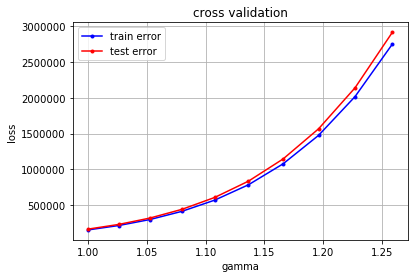

In [5]:
# least squares gradient descent parameters
arg_lsgd = dict()
arg_lsgd['method'] = 'lsgd'
arg_lsgd['loss'] = 'rmse'
arg_lsgd['degree'] = 3
arg_lsgd['k_fold'] = 10
arg_lsgd['max_iters'] = 10
arg_lsgd['initial_w'] = np.zeros(x.shape[1]*arg_lsgd['degree']+1)


# optimization parameters
gamma_min = 1e-5
gamma_max = 1e-1
gamma_steps = 10

# optimize lambda_
gamma_opt = optimize_gamma(y, x, gamma_min, gamma_max, gamma_steps, arg_lsgd)